<h1 align='center' style='color:black'> Customer Segmentation-DGI Group </h1> 

<img src='customersegmentation.PNG' />

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
%matplotlib inline
import scipy.stats 
from scipy.stats import chi2_contingency


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import hierarchical
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

## Loading Data

In [2]:
# Showing all the columns
pd.set_option('display.max_columns',None) 
#pd.set_option('display.max_rows',None)

In [3]:
# Load the Dataset
data=pd.read_csv('cust_seg.csv')
# Printing the data
data

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,28.0,MADRID,1.0,55516.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,75654.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,80634.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,S,NaN,KFC,N,1.0,28.0,MADRID,1.0,57818.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


In [4]:
# Putting the data into dataframe
df= pd.DataFrame(data)
df.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## EDA (Exploratory Data Analysis)

## Printing the Shape

In [5]:
print ("The Shape is : ",data.shape)

The Shape is :  (1000000, 48)


## Printing the Columns Names

In [6]:
print(data.columns)

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')


## Removing 'Unnamed: 0' and  'fecha_dato' column

In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
# Printing the data after removing 'Unnamed: 0' column
data.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
#Drop the fecha_dato column because it was used for partition of the data 
data.drop(['fecha_dato'],axis=1,inplace=True)
# Printing the data after removing 'fecha_dato' column
data.head(2)

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## Data Describtion

In [9]:
# Describibg the customer's age 
data['age'].describe()

count     1000000
unique        115
top            22
freq        51017
Name: age, dtype: object

In [10]:
# Describibg the customer's sex 
data['sexo'].describe()

count     989214
unique         2
top            V
freq      562000
Name: sexo, dtype: object

In [11]:
# Describibg the customer relation type at the beginning of the month 
data['tiprel_1mes'].describe()

count     989218
unique         3
top            A
freq      547800
Name: tiprel_1mes, dtype: object

In [12]:
# Describibg the residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
data['indresi'].describe()

count     989218
unique         2
top            S
freq      982264
Name: indresi, dtype: object

In [13]:
# Describibg the foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
data['indext'].describe()

count     989218
unique         2
top            N
freq      946328
Name: indext, dtype: object

In [14]:
# Describibg the Spouse index (1 if the customer is spouse of an employee)
data['conyuemp'].describe()

count     178
unique      2
top         N
freq      176
Name: conyuemp, dtype: object

In [15]:
# Describibg the deceased index
data['indfall'].describe()

count     989218
unique         2
top            N
freq      986107
Name: indfall, dtype: object

In [16]:
data['pais_residencia'].describe()

count     989218
unique       113
top           ES
freq      982264
Name: pais_residencia, dtype: object

## Looking for Missing Values

In [17]:
data.isnull().sum()

ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp_fin_ult1             0
ind_deco

## Printing Data Type and Capacity of The Data on The Memory

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ncodpers               1000000 non-null  int64  
 1   ind_empleado           989218 non-null   object 
 2   pais_residencia        989218 non-null   object 
 3   sexo                   989214 non-null   object 
 4   age                    1000000 non-null  object 
 5   fecha_alta             989218 non-null   object 
 6   ind_nuevo              989218 non-null   float64
 7   antiguedad             1000000 non-null  object 
 8   indrel                 989218 non-null   float64
 9   ult_fec_cli_1t         1101 non-null     object 
 10  indrel_1mes            989218 non-null   float64
 11  tiprel_1mes            989218 non-null   object 
 12  indresi                989218 non-null   object 
 13  indext                 989218 non-null   object 
 14  conyuemp           

## Some Statistics

In [19]:
# Printing the values of (Sex) column with its domain
data['sexo'].value_counts()

V    562000
H    427214
Name: sexo, dtype: int64

In [20]:
# Printing the values of (deceased index) column with its domain
data['indfall'].value_counts()

N    986107
S      3111
Name: indfall, dtype: int64

In [21]:
# Printing the values of (Spouse index) column with its domain
data['conyuemp'].value_counts()

N    176
S      2
Name: conyuemp, dtype: int64

In [22]:
# Printing the values of (foreigner index) column with its domain
data['indext'].value_counts()

N    946328
S     42890
Name: indext, dtype: int64

In [23]:
# Printing the values of (residence index) column with its domain
data['indresi'].value_counts()

S    982264
N      6954
Name: indresi, dtype: int64

In [24]:
# Printing the values of (Customer relation type at the beginning of the month) column with its domain
data['tiprel_1mes'].value_counts()

A    547800
I    441377
P        41
Name: tiprel_1mes, dtype: int64

## Finding the Duplicate Rows

In [25]:
#store all duplicates
df_duplicates = data[data.duplicated(['ncodpers','age','sexo','nomprov','renta','fecha_alta'])]

In [26]:
#drop all duplicates
newdata = data.drop_duplicates(subset=['ncodpers','age','sexo','nomprov','renta','fecha_alta'],keep = 'last').reset_index(drop = True)

In [27]:
newdata

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626154,1183296,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,28.0,MADRID,1.0,55516.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
626155,1183295,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,75654.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
626156,1183294,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,80634.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
626157,1183293,N,ES,V,36,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,S,NaN,KFC,N,1.0,28.0,MADRID,1.0,57818.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


In [28]:
#check
newdata.duplicated(['ncodpers','age','sexo','nomprov','renta','fecha_alta']).sum()

0

## Handling the  Missing Values

In [29]:
#drop all variables that have more than 80% of the data missing (conyuemp,ult_fec_cli_1t)
newdata.drop(['conyuemp'],axis=1,inplace=True)
newdata.drop(['ult_fec_cli_1t'],axis=1,inplace=True)
newdata.head(1)

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [30]:
#remove all rows with no age
newdata['age'].replace({" NA":""},inplace=True)
newdata['age'] = pd.to_numeric(newdata['age'])
newdata.dropna(subset = ['age'],inplace = True)
newdata.isnull().sum()

ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          2
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
indrel_1mes                   0
tiprel_1mes                   0
indresi                       0
indext                        0
canal_entrada                51
indfall                       0
tipodom                       0
cod_prov                   3682
nomprov                    3682
ind_actividad_cliente         0
renta                    104731
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp_fin_ult1             0
ind_deco_fin_ult1             0
ind_deme_fin_ult1             0
ind_dela

In [31]:
#replace sex, canal_entrada, ind_nomina_ult1 and ind_nom_pens_ult1 using mode
newdata['ind_nom_pens_ult1'] = newdata['ind_nom_pens_ult1'].fillna(newdata['ind_nom_pens_ult1'].mode()[0])
newdata['ind_nomina_ult1'] =newdata['ind_nomina_ult1'].fillna(newdata['ind_nomina_ult1'].mode()[0])
newdata['sexo'] = newdata['sexo'].fillna(newdata['sexo'].mode()[0])

In [32]:
#replce renta (gross income of household) using the mean
newdata['renta'] = newdata['renta'].fillna(newdata['renta'].mean())

In [33]:
#replace the customer's country of resident by code 0 for countries outside europe
newdata['cod_prov'] = newdata['cod_prov'].fillna(0)
newdata['nomprov'] = newdata['nomprov'].fillna('NotEuropean')

In [34]:
#replace the customers channel used to join using the mode
newdata['canal_entrada'] = newdata['canal_entrada'].fillna(newdata['canal_entrada'].mode()[0])

In [35]:
newdata.isnull().sum()

ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
i

## Feature Fixing

In [36]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619174 entries, 0 to 626158
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ncodpers               619174 non-null  int64  
 1   ind_empleado           619174 non-null  object 
 2   pais_residencia        619174 non-null  object 
 3   sexo                   619174 non-null  object 
 4   age                    619174 non-null  float64
 5   fecha_alta             619174 non-null  object 
 6   ind_nuevo              619174 non-null  float64
 7   antiguedad             619174 non-null  object 
 8   indrel                 619174 non-null  float64
 9   indrel_1mes            619174 non-null  float64
 10  tiprel_1mes            619174 non-null  object 
 11  indresi                619174 non-null  object 
 12  indext                 619174 non-null  object 
 13  canal_entrada          619174 non-null  object 
 14  indfall                619174 non-nu

In [37]:
#Organising the variables according to what type they are.
date_vars = ['fecha_alta']

bionomial_vars =['sexo','ind_nuevo','indrel','indresi', 'indext','indfall','ind_actividad_cliente']

multicategorical_vars = ['ind_empleado','pais_residencia', 'cod_prov','tipodom', 'nomprov','canal_entrada', 'indrel_1mes','tiprel_1mes']

intcategorical_vars = ['ind_ahor_fin_ult1','ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1','ind_cno_fin_ult1',
                       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1','ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1', 
                       'ind_plan_fin_ult1','ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1','ind_valo_fin_ult1',
                       'ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1', 'ind_recibo_ult1']
all_cat_vars = ['sexo','ind_nuevo','indrel','indresi', 'indext','indfall','ind_actividad_cliente',
               'ind_empleado','pais_residencia', 'cod_prov', 'nomprov','canal_entrada', 'indrel_1mes','tiprel_1mes',
               'ind_ahor_fin_ult1','ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1','ind_cno_fin_ult1',
                       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1','ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1', 
                       'ind_plan_fin_ult1','ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1','ind_valo_fin_ult1',
                       'ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1', 'ind_recibo_ult1']

numeric_vars = ['ncodpers' ,'age','antiguedad', 'renta','fecha_alta_year']

float_vars = ['ind_nuevo','indrel','age','indrel_1mes','tipodom','cod_prov','ind_actividad_cliente', 'ind_nomina_ult1','ind_nom_pens_ult1']

In [38]:
newdata[float_vars] = newdata[float_vars].round(0).astype('int')
newdata['antiguedad'] = newdata['antiguedad'].astype('int')

In [39]:
newdata[bionomial_vars] = newdata[bionomial_vars].astype('category')
newdata[multicategorical_vars] = newdata[multicategorical_vars].astype('category')
newdata[intcategorical_vars] = newdata[intcategorical_vars].astype('category')

In [40]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619174 entries, 0 to 626158
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ncodpers               619174 non-null  int64   
 1   ind_empleado           619174 non-null  category
 2   pais_residencia        619174 non-null  category
 3   sexo                   619174 non-null  category
 4   age                    619174 non-null  int32   
 5   fecha_alta             619174 non-null  object  
 6   ind_nuevo              619174 non-null  category
 7   antiguedad             619174 non-null  int32   
 8   indrel                 619174 non-null  category
 9   indrel_1mes            619174 non-null  category
 10  tiprel_1mes            619174 non-null  category
 11  indresi                619174 non-null  category
 12  indext                 619174 non-null  category
 13  canal_entrada          619174 non-null  category
 14  indfall             

In [41]:
#checking how the data looks like
newdata.to_csv('outputdata', index = False)

In [42]:
#Fix the date variables: fecha_alta [The date in which the customer become the first holder of contract at the bank]
#subtract each date with the max date and get the number of year since the first time 
newdata['fecha_alta'] = newdata['fecha_alta'].apply(lambda _:datetime.datetime.strptime(_,'%Y-%m-%d'))

In [43]:
max_date = datetime.datetime.strptime('2015-01-28','%Y-%m-%d')
newdata['fecha_alta_year'] = newdata['fecha_alta'].apply(lambda _:((max_date-_)/np.timedelta64(1,'Y')))

In [44]:
#convert to number of years 
newdata['fecha_alta_year'] = newdata['fecha_alta_year'].round(0).astype(int)

In [45]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619174 entries, 0 to 626158
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ncodpers               619174 non-null  int64         
 1   ind_empleado           619174 non-null  category      
 2   pais_residencia        619174 non-null  category      
 3   sexo                   619174 non-null  category      
 4   age                    619174 non-null  int32         
 5   fecha_alta             619174 non-null  datetime64[ns]
 6   ind_nuevo              619174 non-null  category      
 7   antiguedad             619174 non-null  int32         
 8   indrel                 619174 non-null  category      
 9   indrel_1mes            619174 non-null  category      
 10  tiprel_1mes            619174 non-null  category      
 11  indresi                619174 non-null  category      
 12  indext                 619174 non-null  cate

In [46]:
#create a column for that counts the number of accounts each user has
newdata["number_of_accounts"] = newdata[intcategorical_vars].sum(axis=1).astype('int')

## Outliers Detection and Removing

In [47]:
#remove outliers in variable antiguedad
q1_antiguedad = newdata['antiguedad'].quantile(0.25)
q3_antiguedad = newdata['antiguedad'].quantile(0.75)
iqr_antiguedad = q3_antiguedad - q1_antiguedad
lowbound_antiguedad = q1_antiguedad- 1.5*iqr_antiguedad
upperbound_antiguedad = q3_antiguedad + 1.5*iqr_antiguedad

In [48]:
newdata = newdata[((newdata['antiguedad'] < lowbound_antiguedad)|(newdata['antiguedad'] > upperbound_antiguedad))==False]

In [49]:
#remove outliers in age 
q1_age = newdata['age'].quantile(0.25)
q3_age = newdata['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lowbound_age = q1_age - 1.5*iqr_age
upperbound_age = q3_age + 1.5*iqr_age

In [50]:
newdata = newdata[((newdata['age'] < lowbound_age)|(newdata['age'] > upperbound_age))==False]

In [51]:
#remove outliers in renta
q1_renta = newdata['renta'].quantile(0.25)
q3_renta = newdata['renta'].quantile(0.75)
iqr_renta = q3_renta - q1_renta
lowbound_renta = q1_renta - 1.5*iqr_renta
upperbound_renta = q3_renta + 1.5*iqr_renta

In [52]:
newdata = newdata[((newdata['renta'] < lowbound_renta)|(newdata['renta'] > upperbound_renta))==False]

In [53]:
newdata

,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,number_of_accounts
0,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,29,MALAGA,1,87218.100000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,13,CIUDAD REAL,0,35548.740000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
2,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,13,CIUDAD REAL,0,122179.110000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,50,ZARAGOZA,0,119775.540000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
4,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,50,ZARAGOZA,1,134602.202738,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626154,1183296,N,ES,H,27,2013-09-25,0,22,1,1,A,S,N,KFC,N,1,28,MADRID,1,55516.980000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
626155,1183295,N,ES,H,56,2013-09-25,0,22,1,1,A,S,N,KFC,N,1,15,"CORUÑA, A",1,75654.840000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
626156,1183294,N,ES,V,39,2013-09-25,0,22,1,1,A,S,N,KFC,N,1,15,"CORUÑA, A",1,80634.870000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2
626157,1183293,N,ES,V,36,2013-09-25,0,22,1,1,A,S,S,KFC,N,1,28,MADRID,1,57818.460000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2


## Checking Correlation - to see how much those variables  are related 

In [54]:
#relationship between the numeric variables 
index_numeric = ['age','antiguedad', 'renta','number_of_accounts']
df_numeric = newdata[index_numeric]
df_numeric.corr()  #make sense antiguedad describes customer seniority thus it is related to age.

,age,antiguedad,renta,number_of_accounts
age,1.000000,0.609699,0.148001,0.253102
antiguedad,0.609699,1.000000,0.185266,0.366929
renta,0.148001,0.185266,1.000000,0.115368
number_of_accounts,0.253102,0.366929,0.115368,1.000000


In [55]:
#relationship between the categorical variables
#make use of the chi_squared test
#chi2_contingency(pd.crosstab(cat_data['sexo'],cat_data['ind_nuevo']))

In [56]:
def correlation(a,b):
    c,p,dof,expected = chi2_contingency(pd.crosstab(a,b))
    return(p)

In [57]:
corr_df = pd.DataFrame()
plist = []
for name in all_cat_vars:
    for i in all_cat_vars:
        p = correlation(newdata[name], newdata[i])
        plist.append(p)
    corr_df[name]=plist
    plist = []

corr_df    

,sexo,ind_nuevo,indrel,indresi,indext,indfall,ind_actividad_cliente,ind_empleado,pais_residencia,cod_prov,nomprov,canal_entrada,indrel_1mes,tiprel_1mes,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0.000000e+00,6.816388e-03,4.361679e-01,1.789889e-30,5.299513e-28,8.938284e-44,0.000000e+00,2.690358e-06,9.826238e-16,0.000000e+00,0.000000e+00,0.000000e+00,5.626378e-02,0.000000e+00,1.487645e-03,1.695077e-01,0.000000e+00,1.292154e-23,9.757813e-140,2.611743e-08,2.393217e-19,0.000000e+00,1.505209e-147,1.167141e-04,8.091537e-05,6.284110e-123,6.842044e-306,3.882445e-272,7.167808e-119,3.807953e-46,8.980337e-39,0.000000e+00,0.000000e+00,0.000000e+00,4.896034e-18,5.023963e-77,5.026314e-89,0.000000e+00
1,6.816388e-03,0.000000e+00,4.158494e-128,2.146087e-01,2.224201e-02,8.048288e-01,4.120843e-14,9.922099e-01,1.000000e+00,6.680898e-05,6.680898e-05,0.000000e+00,0.000000e+00,0.000000e+00,3.959720e-02,1.917621e-06,2.183501e-08,4.299625e-01,1.246255e-05,6.237737e-01,1.121440e-09,3.102170e-15,1.186274e-03,2.820348e-188,6.415115e-01,1.112493e-02,2.231683e-04,8.377106e-03,1.499873e-01,7.547546e-02,4.801557e-01,2.719231e-03,5.745507e-05,3.260570e-03,3.305240e-01,1.618694e-05,4.377803e-06,1.349230e-06
2,4.361679e-01,4.158494e-128,0.000000e+00,2.777721e-01,7.200707e-01,1.679261e-76,2.551136e-117,9.709361e-01,1.000000e+00,9.365396e-03,9.365396e-03,6.065961e-20,1.510661e-163,4.434714e-01,1.961452e-01,1.033292e-03,8.104431e-03,7.959084e-01,1.659678e-06,2.953181e-02,9.732654e-12,4.761842e-07,1.064475e-03,6.749156e-40,6.769514e-01,7.206275e-02,6.051431e-01,3.697341e-02,6.537362e-02,4.548334e-02,4.847062e-01,3.693125e-04,1.143910e-04,1.799410e-02,9.907721e-02,3.776833e-05,1.590081e-05,2.342116e-04
3,1.789889e-30,2.146087e-01,2.777721e-01,0.000000e+00,0.000000e+00,3.266326e-01,2.914779e-10,9.340093e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.188300e-01,4.397570e-02,9.677052e-01,2.163157e-01,2.185456e-01,8.842482e-01,6.739700e-55,1.132322e-10,5.871464e-06,3.221453e-39,3.076134e-09,4.465842e-01,1.093136e-07,1.263667e-03,3.214164e-12,2.294008e-09,2.541499e-04,4.497142e-01,1.995579e-02,3.088512e-14,1.473524e-07,2.395216e-51,1.640655e-03,6.771588e-45,3.448525e-46,1.999444e-37
4,5.299513e-28,2.224201e-02,7.200707e-01,0.000000e+00,0.000000e+00,4.902971e-03,6.089517e-40,2.603082e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.475434e-01,4.181312e-31,8.789421e-01,8.000107e-01,2.455120e-12,1.531774e-02,8.124233e-09,3.891711e-55,2.176909e-01,4.350778e-142,7.930604e-20,5.951156e-05,2.551083e-02,2.201252e-138,5.949471e-102,2.604529e-32,4.928895e-22,1.938401e-03,1.889119e-185,4.611421e-18,6.294190e-01,4.332362e-40,7.129568e-02,9.025291e-12,1.645116e-15,5.814732e-02
5,8.938284e-44,8.048288e-01,1.679261e-76,3.266326e-01,4.902971e-03,0.000000e+00,1.485289e-07,9.456184e-01,1.000000e+00,1.559560e-14,1.559560e-14,1.270915e-148,9.757221e-01,6.250047e-19,3.285471e-01,6.800522e-03,2.450923e-11,9.914468e-01,1.234963e-09,5.466822e-04,3.168162e-01,1.026972e-123,2.494744e-02,5.506673e-01,8.914771e-01,1.684527e-01,7.459053e-03,2.285994e-22,3.384348e-05,2.627993e-06,4.346315e-04,7.840709e-02,2.898691e-09,1.039765e-19,4.658198e-01,4.890547e-13,3.548602e-09,4.004936e-11
6,0.000000e+00,4.120843e-14,2.551136e-117,2.914779e-10,6.089517e-40,1.485289e-07,0.000000e+00,6.012994e-38,3.826329e-58,0.000000e+00,0.000000e+00,0.000000e+00,4.945051e-01,0.000000e+00,6.219085e-03,4.632150e-04,0.000000e+00,7.610263e-32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.550358e-46,2.242987e-262,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.046623e-134,0.000000e+00,0.000000e+

In [58]:
correlation(newdata['nomprov'],newdata['cod_prov'])

0.0

## Label Encoding

In [59]:
#label Encoding: Normial variables 
#one hot encoding for sexo, indresi, indext, indfall, tipodom,ind_nuevo 
hotcode_label = ['sexo', 'indresi', 'indext', 'indfall', 'tipodom', 'ind_nuevo']
newdata = pd.get_dummies(data = newdata, columns = hotcode_label)
newdata.head() #tipodom has one category 

,ncodpers,ind_empleado,pais_residencia,age,fecha_alta,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_year,number_of_accounts,sexo_H,sexo_V,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,tipodom_1,ind_nuevo_0,ind_nuevo_1
0,1375586,N,ES,35,2015-01-12,6,1,1,A,KHL,29,MALAGA,1,87218.100000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0
1,1050611,N,ES,23,2012-08-10,35,1,1,I,KHE,13,CIUDAD REAL,0,35548.740000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,1,1,0,1,1,0
2,1050612,N,ES,23,2012-08-10,35,1,1,I,KHE,13,CIUDAD REAL,0,122179.110000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,1,0,1,0,1,1,0
3,1050613,N,ES,22,2012-08-10,35,1,1,I,KHD,50,ZARAGOZA,0,119775.540000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,1,0,1,0,1,1,0
4,1050614,N,ES,23,2012-08-10,35,1,1,A,KHE,50,ZARAGOZA,1,134602.202738,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,1,0,1,0,1,1,0


In [60]:
#Make use of frequency encoding for cod_prov, nomprov, pais_residencia
freq_cod_prov = (newdata.groupby('cod_prov').size())/len(newdata)
freq_nomprov = (newdata.groupby('nomprov').size())/len(newdata)
freq_pais_residencia = (newdata.groupby('pais_residencia').size())/len(newdata)
freq_canal_entrada = (newdata.groupby('canal_entrada').size())/len(newdata)

newdata.loc[:,'cod_prov'] = newdata['cod_prov'].map(freq_cod_prov)
newdata.loc[:,'nomprov'] = newdata['nomprov'].map(freq_nomprov)
newdata.loc[:,'pais_residencia'] = newdata['pais_residencia'].map(freq_pais_residencia)
newdata.loc[:,'canal_entrada'] = newdata['canal_entrada'].map(freq_canal_entrada)

In [61]:
#label Encoding: Ordinal variables 
#indrel, indrel_1mes, tiprel_1mes
tiprel_1mes_dict = {'A':3,'I':1,'P':2}
indrel_dict = {1:2,99:1}
indrel_1mes_dict = {1:3,2:2,3:1}


newdata['tiprel_1mes']=newdata.tiprel_1mes.map(tiprel_1mes_dict)
newdata['indrel']=newdata.indrel.map(indrel_dict)
newdata['indrel_1mes']=newdata.indrel_1mes.map(indrel_1mes_dict)


## Feature Selection

In [62]:
#Removing: tipodom_1 (has one class only), fecha_alta(date has been manipulated), nom_prov (is the same as cod_prov), 
#int_categorical variables

drop_cols = ['tipodom_1','fecha_alta','nomprov','ind_ahor_fin_ult1','ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
             'ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
             'ind_deco_fin_ult1','ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 
             'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
             'ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1', 'ind_recibo_ult1']
newdata.drop(drop_cols,axis=1,inplace=True)


In [63]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567592 entries, 0 to 626158
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ncodpers               567592 non-null  int64   
 1   ind_empleado           567592 non-null  category
 2   pais_residencia        567592 non-null  float64 
 3   age                    567592 non-null  int32   
 4   antiguedad             567592 non-null  int32   
 5   indrel                 567592 non-null  category
 6   indrel_1mes            567592 non-null  category
 7   tiprel_1mes            567592 non-null  category
 8   canal_entrada          567592 non-null  float64 
 9   cod_prov               567592 non-null  category
 10  ind_actividad_cliente  567592 non-null  category
 11  renta                  567592 non-null  float64 
 12  fecha_alta_year        567592 non-null  int32   
 13  number_of_accounts     567592 non-null  int32   
 14  sexo_H              

## Model Building

##### Label Encoding and  Feature Scaling

In [64]:
newdata.head(5)

,ncodpers,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,cod_prov,ind_actividad_cliente,renta,fecha_alta_year,number_of_accounts,sexo_H,sexo_V,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0,ind_nuevo_1
0,1375586,N,0.993531,35,6,2,3,3,0.001212,0.029271,1,87218.100000,0,1,1,0,0,1,1,0,1,0,1,0
1,1050611,N,0.993531,23,35,2,3,1,0.357863,0.009669,0,35548.740000,2,1,0,1,0,1,0,1,1,0,1,0
2,1050612,N,0.993531,23,35,2,3,1,0.357863,0.009669,0,122179.110000,2,1,0,1,0,1,1,0,1,0,1,0
3,1050613,N,0.993531,22,35,2,3,1,0.009877,0.026928,0,119775.540000,2,1,1,0,0,1,1,0,1,0,1,0
4,1050614,N,0.993531,23,35,2,3,3,0.357863,0.026928,1,134602.202738,2,1,0,1,0,1,1,0,1,0,1,0


In [65]:
newdatacopy= newdata.copy()

In [67]:
### Converting Variables that are Numerical to a numerical Varaibles
for col in newdatacopy.columns:
    if newdatacopy[col].dtypes  != "int":
        LE =LabelEncoder()
        newdatacopy[col]= LE.fit_transform(newdatacopy[col])

In [68]:
newdatacopy.head(5)

,ncodpers,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,cod_prov,ind_actividad_cliente,renta,fecha_alta_year,number_of_accounts,sexo_H,sexo_V,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0,ind_nuevo_1
0,566428,3,41,35,6,1,2,2,85,46,1,166269,0,1,1,0,0,1,1,0,1,0,1,0
1,370872,3,41,23,35,1,2,0,115,29,0,13990,2,1,0,1,0,1,0,1,1,0,1,0
2,370873,3,41,23,35,1,2,0,115,29,0,252542,2,1,0,1,0,1,1,0,1,0,1,0
3,370874,3,41,22,35,1,2,0,111,45,0,247705,2,1,1,0,0,1,1,0,1,0,1,0
4,370875,3,41,23,35,1,2,2,115,45,1,274752,2,1,0,1,0,1,1,0,1,0,1,0


In [69]:
scaler = StandardScaler()
newscaleddata= scaler.fit_transform(newdatacopy)
newscaleddata= pd.DataFrame(newscaleddata,columns=newdatacopy.columns)

## Print the scaled data
newscaleddata.head(5)

,ncodpers,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,cod_prov,ind_actividad_cliente,renta,fecha_alta_year,number_of_accounts,sexo_H,sexo_V,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0,ind_nuevo_1
0,1.724950,0.024464,0.061322,-0.284563,-1.164309,0.03652,0.006736,0.967046,-3.089256,0.298094,0.937909,-0.369861,-1.150797,-0.501748,1.100677,-1.100677,-0.080694,0.080694,0.215243,-0.215243,0.04348,-0.04348,0.025712,-0.025712
1,0.531441,0.024464,0.061322,-1.020033,-0.713420,0.03652,0.006736,-1.034123,0.358441,-1.095479,-1.066201,-1.893767,-0.785517,-0.501748,-0.908532,0.908532,-0.080694,0.080694,-4.645905,4.645905,0.04348,-0.04348,0.025712,-0.025712
2,0.531447,0.024464,0.061322,-1.020033,-0.713420,0.03652,0.006736,-1.034123,0.358441,-1.095479,-1.066201,0.493501,-0.785517,-0.501748,-0.908532,0.908532,-0.080694,0.080694,0.215243,-0.215243,0.04348,-0.04348,0.025712,-0.025712
3,0.531454,0.024464,0.061322,-1.081322,-0.713420,0.03652,0.006736,-1.034123,-0.101252,0.216119,-1.066201,0.445095,-0.785517,-0.501748,1.100677,-1.100677,-0.080694,0.080694,0.215243,-0.215243,0.04348,-0.04348,0.025712,-0.025712
4,0.531460,0.024464,0.061322,-1.020033,-0.713420,0.03652,0.006736,0.967046,0.358441,0.216119,0.937909,0.715763,-0.785517,-0.501748,-0.908532,0.908532,-0.080694,0.080694,0.215243,-0.215243,0.04348,-0.04348,0.025712,-0.025712


In [70]:
newscaleddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567592 entries, 0 to 567591
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ncodpers               567592 non-null  float64
 1   ind_empleado           567592 non-null  float64
 2   pais_residencia        567592 non-null  float64
 3   age                    567592 non-null  float64
 4   antiguedad             567592 non-null  float64
 5   indrel                 567592 non-null  float64
 6   indrel_1mes            567592 non-null  float64
 7   tiprel_1mes            567592 non-null  float64
 8   canal_entrada          567592 non-null  float64
 9   cod_prov               567592 non-null  float64
 10  ind_actividad_cliente  567592 non-null  float64
 11  renta                  567592 non-null  float64
 12  fecha_alta_year        567592 non-null  float64
 13  number_of_accounts     567592 non-null  float64
 14  sexo_H                 567592 non-nu

## Model Building

- kmeans and 
- Agglomerative Clustering

#### a) Kmeans Clustering
Number of Clusters: 5 

In [71]:
# Initializing the Model
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=0)

# fitting the moel
kmeans.fit(newscaleddata)

clusters = kmeans.labels_
clusters

array([0, 3, 0, ..., 0, 3, 0])

#####  Visualising on the X-Y Plane

In [72]:
# initializing
pca = PCA(n_components=2, random_state=0)

# Fititing the model
principal_components = pca.fit_transform(newscaleddata)
principal_componentsDF = pd.DataFrame(principal_components,columns=['PC1','PC2'])
principal_componentsDF["Cluster"]=clusters+1

## Viewing the Data
principal_componentsDF.head()

,PC1,PC2,Cluster
0,-1.632710,-0.173810,1
1,-2.012077,3.529360,4
2,-1.681069,0.014157,1
3,-2.169415,-0.069450,1
4,-0.630863,-0.300802,1


In [73]:
principal_componentsDF["Label"]= principal_componentsDF["Cluster"].map({1:"cluster 1",2:"cluster 2",3:"cluster 3",4:"cluster 4",5:"cluster 5"})
principal_componentsDF.head(5)

,PC1,PC2,Cluster,Label
0,-1.632710,-0.173810,1,cluster 1
1,-2.012077,3.529360,4,cluster 4
2,-1.681069,0.014157,1,cluster 1
3,-2.169415,-0.069450,1,cluster 1
4,-0.630863,-0.300802,1,cluster 1


<Figure size 720x1440 with 0 Axes>

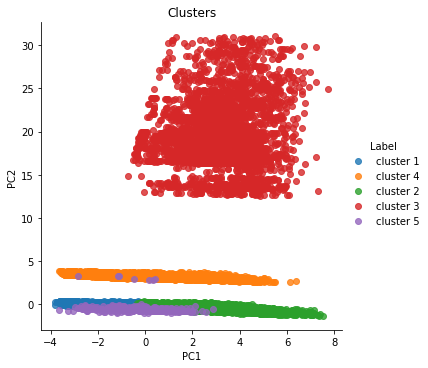

In [74]:
plt.figure(figsize=(10,20))
ax=sns.lmplot(data=principal_componentsDF,x="PC1",y="PC2",hue="Label",fit_reg=False,legend=True, legend_out=True)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.show()

#### b) Agglomerate Clustering - Hierarchical

In [ ]:
aggcluster = AgglomerativeClustering(n_clusters=5, affinity="l1",linkage="single")
aggcluster.fit_predict(newscaleddata)

In [ ]:
plt.figure(figsize=(10,20))
plt.scatter(newscaleddata["ncodpers"],newscaleddata["ind_empleado"],c=aggcluster.labels_)
plt.show()

## Model Evaluation

## Model Saving